In [237]:
# Importing initial libraries

import pandas as pd
import numpy as np
import seaborn as sns 

In [214]:
# Question 1

In [2]:
# Data was downloaded as csv files from https://www.alphavantage.co API
# The timespans of observations for Apple and Google are less then 10 years and has no time to look for more expanded data
# However, the code will be the same, so I decided to focus on the other questions.

gg_stock = pd.read_csv('/Users/dyachmenev/Desktop/daily_GOOG.csv', delimiter = ',')
fb_stock = pd.read_csv('/Users/dyachmenev/Desktop/daily_AAPL.csv', delimiter = ',')
ap_stock = pd.read_csv('/Users/dyachmenev/Desktop/daily_FB.csv', delimiter = ',')

In [7]:
gg_stock

,timestamp,open,high,low,close,volume
0,2020-04-24,1261.170,1280.40,1249.45,1279.31,1634382
1,2020-04-23,1271.550,1293.31,1265.67,1276.31,1566203
2,2020-04-22,1245.540,1285.61,1242.00,1263.21,2093140
3,2020-04-21,1247.000,1254.27,1209.71,1216.34,2153003
4,2020-04-20,1271.000,1281.60,1261.37,1266.61,1695488
...,...,...,...,...,...,...
1526,2014-04-02,565.106,604.83,562.19,567.00,146700
1527,2014-04-01,558.710,568.45,558.71,567.16,7900
1528,2014-03-31,566.890,567.00,556.93,556.97,10800
1529,2014-03-28,561.200,566.43,558.67,559.99,41100


In [8]:
fb_stock

,timestamp,open,high,low,close,volume
0,2020-04-24,277.20,283.01,277.00,282.97,31274973
1,2020-04-23,275.87,281.75,274.87,275.03,31203582
2,2020-04-22,273.61,277.90,272.20,276.10,29264342
3,2020-04-21,276.28,277.25,265.43,268.37,45247893
4,2020-04-20,277.95,281.68,276.85,276.93,32503750
...,...,...,...,...,...,...
5028,2000-04-28,127.12,127.50,121.31,124.06,2228400
5029,2000-04-27,117.19,127.00,116.58,126.75,2916100
5030,2000-04-26,126.62,128.00,120.00,121.31,3276000
5031,2000-04-25,122.12,128.75,122.06,128.31,3496800


In [9]:
ap_stock

,timestamp,open,high,low,close,volume
0,2020-04-24,183.23,190.41,180.8250,190.0700,28371184
1,2020-04-23,184.08,187.05,183.1500,185.1300,21426604
2,2020-04-22,178.45,184.78,178.1400,182.2800,33369931
3,2020-04-21,175.25,175.38,168.3408,170.8000,24850528
4,2020-04-20,177.41,180.50,176.7700,178.2400,16110664
...,...,...,...,...,...,...
1991,2012-05-24,32.95,33.21,31.7700,33.0300,50237200
1992,2012-05-23,31.37,32.50,31.3600,32.0000,73600000
1993,2012-05-22,32.61,33.59,30.9400,31.0000,101786600
1994,2012-05-21,36.53,36.66,33.0000,34.0300,168192700


In [4]:
gg_stock.dtypes

timestamp     object
open         float64
high         float64
low          float64
close        float64
volume         int64
dtype: object

In [27]:
# Choosing only relevant columns

df_gg = gg_stock[['timestamp', 'close']].copy()
df_fb = fb_stock[['timestamp', 'close']].copy()
df_ap = ap_stock[['timestamp', 'close']].copy()

In [213]:
# Question 2

In [28]:
# Calculating returns

df_gg['returns'] = (df_gg['close'].shift(1) - df_gg['close'])/df_gg['close']
df_fb['returns'] = (df_fb['close'].shift(1) - df_fb['close'])/df_fb['close']
df_ap['returns'] = (df_ap['close'].shift(1) - df_ap['close'])/df_ap['close']

In [215]:
# Before guessing the distribution of these time series, we have to check if they are stationary

In [220]:
# Using augmented Dickey-Fuller test to check for stationarity

In [221]:
from statsmodels.tsa.stattools import adfuller
def ADF_test(X):
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [59]:
ADF_test(df_gg['returns'][1:].values)

ADF Statistic: -13.505766
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


In [60]:
ADF_test(df_fb['returns'][1:].values)

ADF Statistic: -20.345102
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [61]:
ADF_test(df_ap['returns'][1:].values)

ADF Statistic: -14.222076
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [62]:
# p-values are zeros for all the tests, so for every company the null hypothesis is rejected and series are stationary

In [222]:
# Now we can apply Kolmogorov-Smirnov test to select the most fitting distribution type

In [216]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "t", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [217]:
get_best_distribution(df_gg['returns'][1:])

p value for norm = 3.674419492557757e-12
p value for t = 0.8130876478262634
p value for exponweib = 8.849631896845556e-13
p value for weibull_max = 4.663678842406587e-28
p value for weibull_min = 9.459739572687643e-36


/Users/dyachmenev/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


p value for pareto = 0.0
p value for genextreme = 4.3759240378973905e-108
Best fitting distribution: t
Best p value: 0.8130876478262634
Parameters for the best fit: (2.8693188951365225, 0.0009581913105388333, 0.009759620028228996)


('t',
 0.8130876478262634,
 (2.8693188951365225, 0.0009581913105388333, 0.009759620028228996))

In [218]:
get_best_distribution(df_fb['returns'][1:])

p value for norm = 2.994776455926736e-54
p value for t = 0.17064059619504923
p value for exponweib = 1.6261668238762227e-37
p value for weibull_max = 3.795974505591246e-259
p value for weibull_min = 7.748088237081325e-258
p value for pareto = 0.0
p value for genextreme = 0.0
Best fitting distribution: t
Best p value: 0.17064059619504923
Parameters for the best fit: (2.877994439819035, 0.001007173018200934, 0.015333317858872526)


/Users/dyachmenev/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:2402: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)


('t',
 0.17064059619504923,
 (2.877994439819035, 0.001007173018200934, 0.015333317858872526))

In [219]:
get_best_distribution(df_ap['returns'][1:])

p value for norm = 1.3215024377142306e-15
p value for t = 0.7423517720057559
p value for exponweib = 2.4314646828967596e-17
p value for weibull_max = 3.1793458129602293e-53
p value for weibull_min = 7.196629820532664e-72
p value for pareto = 0.0
p value for genextreme = 3.2134103832399774e-53
Best fitting distribution: t
Best p value: 0.7423517720057559
Parameters for the best fit: (2.7998483104734335, 0.0011139690937561819, 0.013498037235380457)


('t',
 0.7423517720057559,
 (2.7998483104734335, 0.0011139690937561819, 0.013498037235380457))

In [223]:
# As we see, the most fitting type is Student-t distribution.
# Therefore, all the series have t-distribution with N-1 degrees of freedom (number of observations for each series)

In [224]:
# Autocorrelation check with ACF plots

In [86]:
from statsmodels.graphics.tsaplots import plot_acf

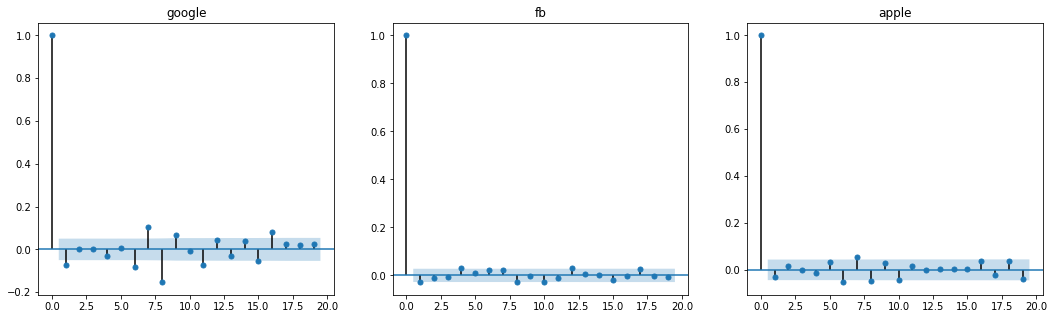

In [225]:
f1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
#f3.tight_layout()

plot_acf(df_gg['returns'][1:], ax=ax1, lags = range(0,20))
ax1.set_title('google')

plot_acf(df_fb['returns'][1:], ax=ax2, lags = range(0, 20))
ax2.set_title('fb')

plot_acf(df_ap['returns'][1:], ax=ax3, lags = range(0, 20)) 
ax3.set_title('apple')

plt.show()

In [ ]:
# Charts show that there is almost no autocorrelation as ACF is vary rarely stands out significantly 
# (only for google at 6th and 8th lags)

In [226]:
# Calculating correlation and Granger causality

In [81]:
# Combining sets for more comfortable calculations

df_all = df_gg.merge(df_fb, on= "timestamp", how = 'inner', 
                     suffixes=('_gg', '')).merge(df_ap, on= "timestamp", how = 'inner',
                                                        suffixes=('_fb', '_ap'))[1:].copy()

In [83]:
df_all

,timestamp,close_gg,returns_gg,close_fb,returns_fb,close_ap,returns_ap
1,2020-04-23,1276.31,0.002351,275.03,0.028870,185.13,0.026684
2,2020-04-22,1263.21,0.010370,276.10,-0.003875,182.28,0.015635
3,2020-04-21,1216.34,0.038534,268.37,0.028804,170.80,0.067213
4,2020-04-20,1266.61,-0.039689,276.93,-0.030910,178.24,-0.041741
5,2020-04-17,1283.25,-0.012967,282.80,-0.020757,179.24,-0.005579
...,...,...,...,...,...,...,...
1526,2014-04-02,567.00,0.004832,542.55,-0.006930,62.72,-0.051499
1527,2014-04-01,567.16,-0.000282,541.65,0.001662,62.62,0.001597
1528,2014-03-31,556.97,0.018295,536.74,0.009148,60.24,0.039509
1529,2014-03-28,559.99,-0.005393,536.86,-0.000224,60.01,0.003833


In [227]:
# There is a medium correlation (~0.65) between returns of google and apple, but nothing else to say here

df_all[['returns_gg', 'returns_ap', 'returns_fb']].corr()

,returns_gg,returns_ap,returns_fb
returns_gg,1.000000,0.654787,0.361272
returns_ap,0.654787,1.000000,0.327794
returns_fb,0.361272,0.327794,1.000000


In [ ]:
# Checking if 1 series can be predicted with another via Granger causality

In [87]:
from statsmodels.tsa.stattools import grangercausalitytests

In [228]:
# Google-Facebook pair

In [97]:
grangercausalitytests(df_all[['returns_gg', 'returns_fb']], maxlag=12) # check if fb predicts gg


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.3875  , p=0.1225  , df_denom=1526, df_num=1
ssr based chi2 test:   chi2=2.3921  , p=0.1219  , df=1
likelihood ratio test: chi2=2.3903  , p=0.1221  , df=1
parameter F test:         F=2.3875  , p=0.1225  , df_denom=1526, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7976  , p=0.1660  , df_denom=1523, df_num=2
ssr based chi2 test:   chi2=3.6070  , p=0.1647  , df=2
likelihood ratio test: chi2=3.6028  , p=0.1651  , df=2
parameter F test:         F=1.7976  , p=0.1660  , df_denom=1523, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2400  , p=0.2937  , df_denom=1520, df_num=3
ssr based chi2 test:   chi2=3.7372  , p=0.2913  , df=3
likelihood ratio test: chi2=3.7326  , p=0.2918  , df=3
parameter F test:         F=1.2400  , p=0.2937  , df_denom=1520, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9438  , p=0.

{1: ({'ssr_ftest': (2.3874533902512862, 0.12252007695583678, 1526.0, 1),
   'ssr_chi2test': (2.392146942132514, 0.1219460499141147, 1),
   'lrtest': (2.390277613980288, 0.12209194525899432, 1),
   'params_ftest': (2.3874533902513932, 0.12252007695582638, 1526.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.797609650781953, 0.16604586224023332, 1523.0, 2),
   'ssr_chi2test': (3.6070223852853895, 0.1647195097314009, 2),
   'lrtest': (3.602771674783071, 0.16506996950020905, 2),
   'params_ftest': (1.797609650781998, 0.16604586224023332, 1523.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.240017983069365, 0.2937214397125952, 1520.0, 3),
   'ssr_chi2test': (3.737185776605764, 0.2912775058919575, 3),
   'lrtest': (3.732620023036361, 0.29182143007485767, 3),
   'params_ftest': (1.2400179830693685, 0.2937214397125952, 1520.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.,

In [98]:
grangercausalitytests(df_all[['returns_fb', 'returns_gg']], maxlag=12) # check if gg predicts fb


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.4628  , p=0.0196  , df_denom=1526, df_num=1
ssr based chi2 test:   chi2=5.4736  , p=0.0193  , df=1
likelihood ratio test: chi2=5.4638  , p=0.0194  , df=1
parameter F test:         F=5.4628  , p=0.0196  , df_denom=1526, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.8822  , p=0.0208  , df_denom=1523, df_num=2
ssr based chi2 test:   chi2=7.7899  , p=0.0203  , df=2
likelihood ratio test: chi2=7.7701  , p=0.0205  , df=2
parameter F test:         F=3.8822  , p=0.0208  , df_denom=1523, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6498  , p=0.0475  , df_denom=1520, df_num=3
ssr based chi2 test:   chi2=7.9859  , p=0.0463  , df=3
likelihood ratio test: chi2=7.9651  , p=0.0467  , df=3
parameter F test:         F=2.6498  , p=0.0475  , df_denom=1520, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9615  , p=0.

{1: ({'ssr_ftest': (5.462814975643282, 0.019554057539418985, 1526.0, 1),
   'ssr_chi2test': (5.473554454625543, 0.019306321483814587, 1),
   'lrtest': (5.463780586344001, 0.019414597023576584, 1),
   'params_ftest': (5.462814975643441, 0.019554057539418985, 1526.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.882194768445054, 0.02080977633550575, 1523.0, 2),
   'ssr_chi2test': (7.7898799818569175, 0.02034459527280322, 2),
   'lrtest': (7.770090461817745, 0.020546899385478677, 2),
   'params_ftest': (3.8821947684448492, 0.02080977633551172, 1523.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.649757906483503, 0.04745593280653893, 1520.0, 3),
   'ssr_chi2test': (7.985882216842716, 0.04630438055819386, 3),
   'lrtest': (7.965072513952691, 0.046739093751186865, 3),
   'params_ftest': (2.649757906483386, 0.04745593280654252, 1520.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
         

In [ ]:
# For the observed maxlag, FB returns help to predict GG rerturns only for lag 8-10 (p < 0.05).
# So it doesn't seem convincing enough.

# However, the impact of GG is much more sunsible (p < 0.05 for 1-3 and 8-12 lags)
# So seems like GG returns impact FB returns at some level.

In [ ]:
# Facebook-Apple pair

In [99]:
grangercausalitytests(df_all[['returns_fb', 'returns_ap']], maxlag=12) # check if ap predicts fb


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=31.3110 , p=0.0000  , df_denom=1526, df_num=1
ssr based chi2 test:   chi2=31.3726 , p=0.0000  , df=1
likelihood ratio test: chi2=31.0550 , p=0.0000  , df=1
parameter F test:         F=31.3110 , p=0.0000  , df_denom=1526, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=15.6096 , p=0.0000  , df_denom=1523, df_num=2
ssr based chi2 test:   chi2=31.3218 , p=0.0000  , df=2
likelihood ratio test: chi2=31.0051 , p=0.0000  , df=2
parameter F test:         F=15.6096 , p=0.0000  , df_denom=1523, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=10.6184 , p=0.0000  , df_denom=1520, df_num=3
ssr based chi2 test:   chi2=32.0019 , p=0.0000  , df=3
likelihood ratio test: chi2=31.6712 , p=0.0000  , df=3
parameter F test:         F=10.6184 , p=0.0000  , df_denom=1520, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=7.7875  , p=0.

{1: ({'ssr_ftest': (31.311007044387374, 2.601679569757639e-08, 1526.0, 1),
   'ssr_chi2test': (31.37256210410766, 2.1296938420090042e-08, 1),
   'lrtest': (31.055041436307874, 2.5081402737641554e-08, 1),
   'params_ftest': (31.31100704438717, 2.6016795697578607e-08, 1526.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (15.609648975014045, 1.9469830501064425e-07, 1523.0, 2),
   'ssr_chi2test': (31.321790720711046, 1.5796452406642313e-07, 2),
   'lrtest': (31.005085692744615, 1.850679380882169e-07, 2),
   'params_ftest': (15.609648975013966, 1.9469830501064425e-07, 1523.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (10.618409833737397, 6.553589377182088e-07, 1520.0, 3),
   'ssr_chi2test': (32.00193121602041, 5.228564134154909e-07, 3),
   'lrtest': (31.671205557124267, 6.138647638818178e-07, 3),
   'params_ftest': (10.618409833737447, 6.553589377182088e-07, 1520.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0.,

In [100]:
grangercausalitytests(df_all[['returns_ap', 'returns_fb']], maxlag=12) # check if fb predicts ap


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7510  , p=0.3863  , df_denom=1526, df_num=1
ssr based chi2 test:   chi2=0.7524  , p=0.3857  , df=1
likelihood ratio test: chi2=0.7523  , p=0.3858  , df=1
parameter F test:         F=0.7510  , p=0.3863  , df_denom=1526, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6354  , p=0.5299  , df_denom=1523, df_num=2
ssr based chi2 test:   chi2=1.2749  , p=0.5286  , df=2
likelihood ratio test: chi2=1.2744  , p=0.5288  , df=2
parameter F test:         F=0.6354  , p=0.5299  , df_denom=1523, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5652  , p=0.6380  , df_denom=1520, df_num=3
ssr based chi2 test:   chi2=1.7033  , p=0.6362  , df=3
likelihood ratio test: chi2=1.7024  , p=0.6364  , df=3
parameter F test:         F=0.5652  , p=0.6380  , df_denom=1520, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3336  , p=0.

{1: ({'ssr_ftest': (0.750967393565734, 0.3863063531841531, 1526.0, 1),
   'ssr_chi2test': (0.7524437383761516, 0.3857036299775941, 1),
   'lrtest': (0.7522586546947423, 0.3857620681872115, 1),
   'params_ftest': (0.7509673935660394, 0.38630635318409945, 1526.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.6353754782975, 0.5298769043287703, 1523.0, 2),
   'ssr_chi2test': (1.274922824476139, 0.528632702625309, 2),
   'lrtest': (1.2743912391906633, 0.5287732279828532, 2),
   'params_ftest': (0.6353754782976895, 0.5298769043286805, 1523.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.5651748344689966, 0.638015543815996, 1520.0, 3),
   'ssr_chi2test': (1.703332839935838, 0.6361930833765435, 3),
   'lrtest': (1.702383531821397, 0.6364040120108427, 3),
   'params_ftest': (0.5651748344689927, 0.638015543815996, 1520.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.,

In [229]:
# Here we see that FB returns hardly predict Apple returns (no p<0.05), while there is a strong evidence, that
# Apple ones predicts FB's a lot (all p < 0.001)

# This seems very reasonable, because social network problems or rises hardly can impact the willingness of people to
# buy macs, but the expansion of Apple devices or their drop of usage can push returns of FB in respective ways

In [230]:
# Google-Apple pair

In [101]:
grangercausalitytests(df_all[['returns_gg', 'returns_ap']], maxlag=12) # check if fb predicts ap


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6860  , p=0.1943  , df_denom=1526, df_num=1
ssr based chi2 test:   chi2=1.6893  , p=0.1937  , df=1
likelihood ratio test: chi2=1.6884  , p=0.1938  , df=1
parameter F test:         F=1.6860  , p=0.1943  , df_denom=1526, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9552  , p=0.3850  , df_denom=1523, df_num=2
ssr based chi2 test:   chi2=1.9167  , p=0.3835  , df=2
likelihood ratio test: chi2=1.9155  , p=0.3838  , df=2
parameter F test:         F=0.9552  , p=0.3850  , df_denom=1523, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9058  , p=0.4376  , df_denom=1520, df_num=3
ssr based chi2 test:   chi2=2.7298  , p=0.4352  , df=3
likelihood ratio test: chi2=2.7274  , p=0.4356  , df=3
parameter F test:         F=0.9058  , p=0.4376  , df_denom=1520, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6039  , p=0.

{1: ({'ssr_ftest': (1.6859922582282714, 0.19432631037832018, 1526.0, 1),
   'ssr_chi2test': (1.68930679084602, 0.19369237459704164, 1),
   'lrtest': (1.6883742672343942, 0.193815415223294, 1),
   'params_ftest': (1.6859922582283313, 0.19432631037832018, 1526.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.9552245595850012, 0.38495611279100383, 1523.0, 2),
   'ssr_chi2test': (1.9167211123386498, 0.3835211322013177, 2),
   'lrtest': (1.9155199505512428, 0.3837515368470379, 2),
   'params_ftest': (0.9552245595849933, 0.38495611279100383, 1523.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.9057584820055147, 0.4375586996038039, 1520.0, 3),
   'ssr_chi2test': (2.7297892145179365, 0.4351886437553273, 3),
   'lrtest': (2.727352122134107, 0.4355990822372259, 3),
   'params_ftest': (0.9057584820055603, 0.4375586996038039, 1520.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0

In [102]:
grangercausalitytests(df_all[['returns_ap', 'returns_fb']], maxlag=12) # check if ap predicts fb


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7510  , p=0.3863  , df_denom=1526, df_num=1
ssr based chi2 test:   chi2=0.7524  , p=0.3857  , df=1
likelihood ratio test: chi2=0.7523  , p=0.3858  , df=1
parameter F test:         F=0.7510  , p=0.3863  , df_denom=1526, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6354  , p=0.5299  , df_denom=1523, df_num=2
ssr based chi2 test:   chi2=1.2749  , p=0.5286  , df=2
likelihood ratio test: chi2=1.2744  , p=0.5288  , df=2
parameter F test:         F=0.6354  , p=0.5299  , df_denom=1523, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5652  , p=0.6380  , df_denom=1520, df_num=3
ssr based chi2 test:   chi2=1.7033  , p=0.6362  , df=3
likelihood ratio test: chi2=1.7024  , p=0.6364  , df=3
parameter F test:         F=0.5652  , p=0.6380  , df_denom=1520, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3336  , p=0.

{1: ({'ssr_ftest': (0.750967393565734, 0.3863063531841531, 1526.0, 1),
   'ssr_chi2test': (0.7524437383761516, 0.3857036299775941, 1),
   'lrtest': (0.7522586546947423, 0.3857620681872115, 1),
   'params_ftest': (0.7509673935660394, 0.38630635318409945, 1526.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.6353754782975, 0.5298769043287703, 1523.0, 2),
   'ssr_chi2test': (1.274922824476139, 0.528632702625309, 2),
   'lrtest': (1.2743912391906633, 0.5287732279828532, 2),
   'params_ftest': (0.6353754782976895, 0.5298769043286805, 1523.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.5651748344689966, 0.638015543815996, 1520.0, 3),
   'ssr_chi2test': (1.703332839935838, 0.6361930833765435, 3),
   'lrtest': (1.702383531821397, 0.6364040120108427, 3),
   'params_ftest': (0.5651748344689927, 0.638015543815996, 1520.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.,

In [231]:
# Seems like Google and Apple are pretty independent with their returns as there are no p < 0.05 for both test

In [232]:
# Question 3

In [233]:
# Setting parameters of f_i
mean_f, std_f = 0, 1 

In [125]:
# Function for creating new datasets that add 3 variants of f_i and pnl_i to the old ones

def f_i_pnl(df_i):
    
    df = df_i
    
    df['f_i_1'] = np.random.normal(mean_f, std_f, len(df))
    df['f_i_2'] = np.random.normal(mean_f, std_f, len(df))
    df['f_i_3'] = np.random.normal(mean_f, std_f, len(df))
    
    df['pnl_1'] = df['f_i_1'] * df['returns']
    df['pnl_2'] = df['f_i_2'] * df['returns']
    df['pnl_3'] = df['f_i_3'] * df['returns']
    
    return df

In [130]:
gg = f_i_pnl(df_gg)
fb = f_i_pnl(df_fb)
ap = f_i_pnl(df_ap)

In [134]:
gg

,timestamp,close,returns,f_i_1,f_i_2,f_i_3,pnl_1,pnl_2,pnl_3
0,2020-04-24,1279.31,NaN,-0.063971,-2.149277,1.806946,NaN,NaN,NaN
1,2020-04-23,1276.31,0.002351,0.533046,-1.077739,3.039940,0.001253,-0.002533,0.007145
2,2020-04-22,1263.21,0.010370,-0.910106,0.031263,-0.026134,-0.009438,0.000324,-0.000271
3,2020-04-21,1216.34,0.038534,-0.024246,0.490235,-1.130985,-0.000934,0.018891,-0.043581
4,2020-04-20,1266.61,-0.039689,0.243881,1.629159,0.649177,-0.009679,-0.064659,-0.025765
...,...,...,...,...,...,...,...,...,...
1526,2014-04-02,567.00,0.004832,-1.145534,-0.586367,-0.471007,-0.005536,-0.002834,-0.002276
1527,2014-04-01,567.16,-0.000282,0.746851,-1.158058,-0.229181,-0.000211,0.000327,0.000065
1528,2014-03-31,556.97,0.018295,0.587943,0.958894,-1.348912,0.010757,0.017543,-0.024679
1529,2014-03-28,559.99,-0.005393,-1.269678,-0.512688,0.140036,0.006847,0.002765,-0.000755


In [155]:
# Function for plotting pnl and cumsum(pnl) for the given set and company

def plot_pnl_stats(df, company_name = None):
    
    print(company_name + ' pnl_i') # pnl plotting

    f1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    ax1 = sns.lineplot(x=gg.index, y="pnl_1", data=gg, ax=ax1)
    ax1.set_title('pnl_1')

    ax2 = sns.lineplot(x=gg.index, y="pnl_2", data=gg, ax=ax2)
    ax2.set_title('pnl_2')

    ax3 = sns.lineplot(x=gg.index, y="pnl_3", data=gg, ax=ax3)
    ax3.set_title('pnl_3')

    plt.show()

    print(company_name + ' cumsum of pnl_i') # cumsum of pnl plotting

    f1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    ax1 = sns.lineplot(x=gg.index, y=np.cumsum(gg.pnl_1), data=gg, ax=ax1)
    ax1.set_title('cumsum(pnl_1)')

    ax2 = sns.lineplot(x=gg.index, y=np.cumsum(gg.pnl_1), data=gg, ax=ax2)
    ax2.set_title('cumsum(pnl_2)')

    ax3 = sns.lineplot(x=gg.index, y=np.cumsum(gg.pnl_1), data=gg, ax=ax3)
    ax3.set_title('cumsum(pnl_3)')

    plt.show()

Google pnl_i


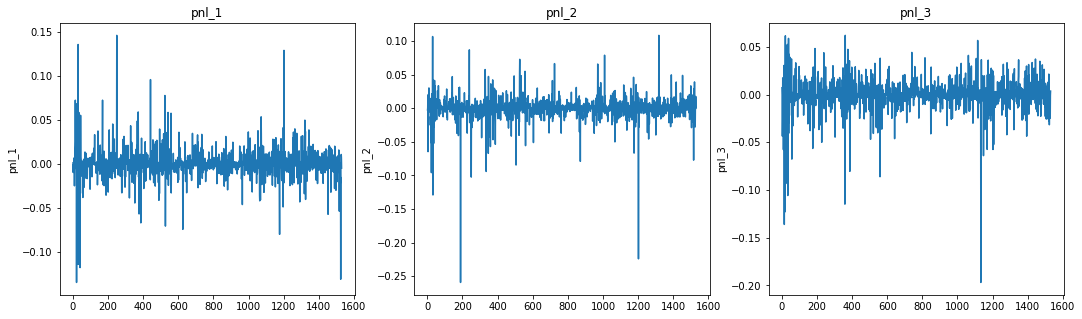

Google cumsum of pnl_i


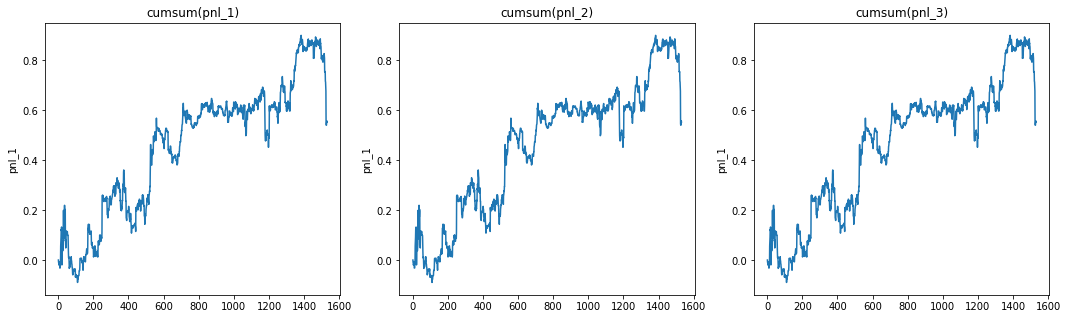

In [156]:
plot_pnl_stats(gg, 'Google')

Facebook pnl_i


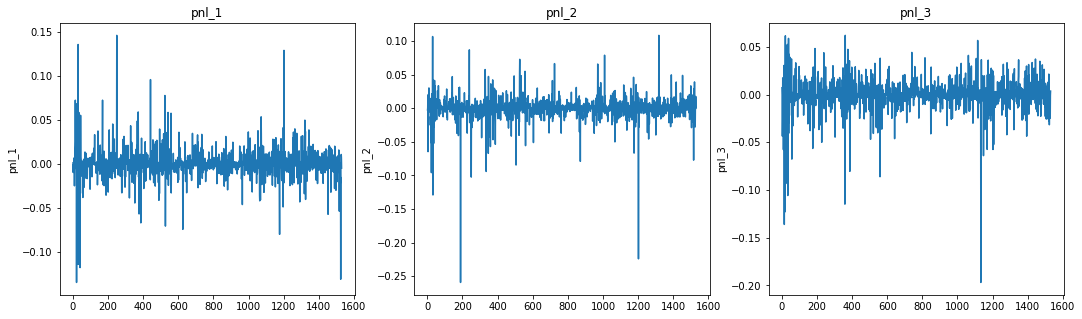

Facebook cumsum of pnl_i


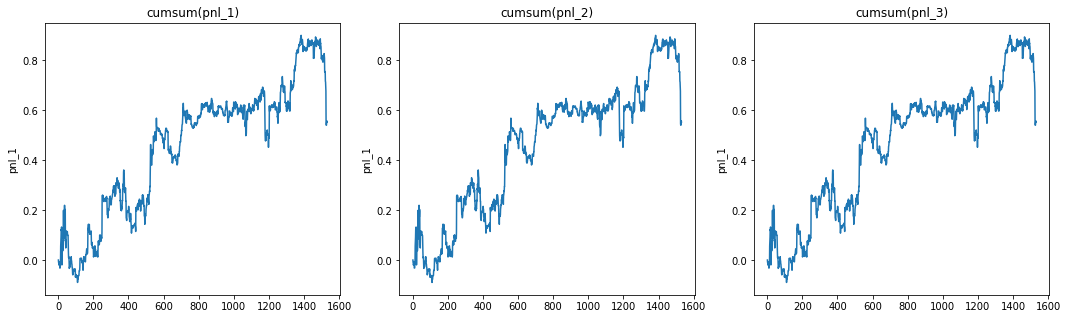

In [158]:
plot_pnl_stats(fb, 'Facebook')

Apple pnl_i


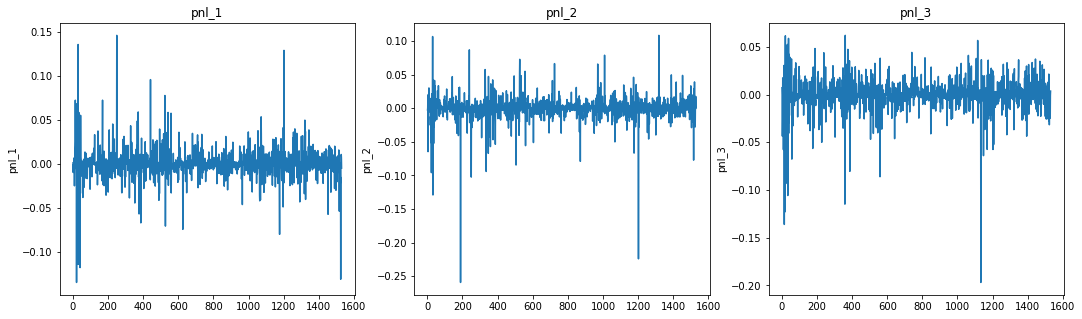

Apple cumsum of pnl_i


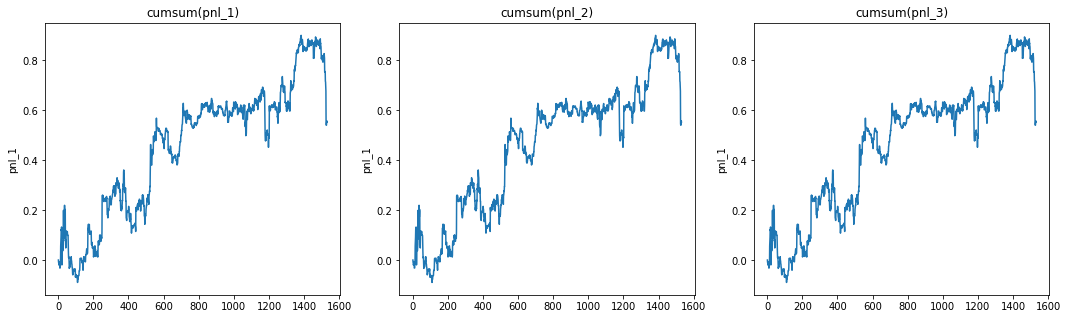

In [159]:
plot_pnl_stats(ap, 'Apple')

In [234]:
# Question 4 & 5 (partially) 

In [ ]:
# Had time only for Google, but it can be easily applied to the other sets as well.

In [184]:
# Making copies of datasets in order to not to spoil them accidentially in further calculations
# Flip them in order to ease the use of expanding() method

gg_1 = gg.iloc[::-1].reset_index(drop = True).copy()
fb_1 = fb.iloc[::-1].reset_index(drop = True).copy()
ap_1 = ap.iloc[::-1].reset_index(drop = True).copy()

In [185]:
gg_1

,timestamp,close,returns,f_i_1,f_i_2,f_i_3,pnl_1,pnl_2,pnl_3
0,2014-03-27,558.46,0.002740,-1.736994,0.184503,1.330550,-0.004759,0.000505,0.003645
1,2014-03-28,559.99,-0.005393,-1.269678,-0.512688,0.140036,0.006847,0.002765,-0.000755
2,2014-03-31,556.97,0.018295,0.587943,0.958894,-1.348912,0.010757,0.017543,-0.024679
3,2014-04-01,567.16,-0.000282,0.746851,-1.158058,-0.229181,-0.000211,0.000327,0.000065
4,2014-04-02,567.00,0.004832,-1.145534,-0.586367,-0.471007,-0.005536,-0.002834,-0.002276
...,...,...,...,...,...,...,...,...,...
1526,2020-04-20,1266.61,-0.039689,0.243881,1.629159,0.649177,-0.009679,-0.064659,-0.025765
1527,2020-04-21,1216.34,0.038534,-0.024246,0.490235,-1.130985,-0.000934,0.018891,-0.043581
1528,2020-04-22,1263.21,0.010370,-0.910106,0.031263,-0.026134,-0.009438,0.000324,-0.000271
1529,2020-04-23,1276.31,0.002351,0.533046,-1.077739,3.039940,0.001253,-0.002533,0.007145


In [188]:
# Calculating hit rate
# I multiply f_i and real returns here. If they are the same direction, then it will be counted as True (1).
# Use expanding() method in order to calculate the metrics based on up-to-date basis (using only what was available for each date)

gg_1['HR_1'] = ((gg_1['f_i_1'] * gg_1['returns']) >= 0).expanding(1).mean()
gg_1['HR_2'] = ((gg_1['f_i_2'] * gg_1['returns']) >= 0).expanding(1).mean()
gg_1['HR_3'] = ((gg_1['f_i_3'] * gg_1['returns']) >= 0).expanding(1).mean()

In [190]:
# Calculating Sharpe Ratio

gg_1['SR_1'] = (gg['pnl_1']).expanding(1).mean() / (gg['pnl_1']).expanding(1).var()
gg_1['SR_2'] = (gg['pnl_2']).expanding(1).mean() / (gg['pnl_2']).expanding(1).var()
gg_1['SR_3'] = (gg['pnl_3']).expanding(1).mean() / (gg['pnl_3']).expanding(1).var()

In [191]:
gg_1

,timestamp,close,returns,f_i_1,f_i_2,f_i_3,pnl_1,pnl_2,pnl_3,HR_1,HR_2,HR_3,SR_1,SR_2,SR_3
0,2014-03-27,558.46,0.002740,-1.736994,0.184503,1.330550,-0.004759,0.000505,0.003645,0.000000,1.000000,1.000000,NaN,NaN,NaN
1,2014-03-28,559.99,-0.005393,-1.269678,-0.512688,0.140036,0.006847,0.002765,-0.000755,0.500000,1.000000,0.500000,NaN,NaN,NaN
2,2014-03-31,556.97,0.018295,0.587943,0.958894,-1.348912,0.010757,0.017543,-0.024679,0.666667,1.000000,0.333333,-71.611957,-270.548702,124.980592
3,2014-04-01,567.16,-0.000282,0.746851,-1.158058,-0.229181,-0.000211,0.000327,0.000065,0.500000,1.000000,0.500000,-95.292810,41.094858,-16.299786
4,2014-04-02,567.00,0.004832,-1.145534,-0.586367,-0.471007,-0.005536,-0.002834,-0.002276,0.400000,0.800000,0.400000,-145.559115,-9.066721,-28.593791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,2020-04-20,1266.61,-0.039689,0.243881,1.629159,0.649177,-0.009679,-0.064659,-0.025765,0.510806,0.519319,0.499018,1.333359,-1.461456,-1.584337
1527,2020-04-21,1216.34,0.038534,-0.024246,0.490235,-1.130985,-0.000934,0.018891,-0.043581,0.510471,0.519634,0.498691,1.332839,-1.460748,-1.584167
1528,2020-04-22,1263.21,0.010370,-0.910106,0.031263,-0.026134,-0.009438,0.000324,-0.000271,0.510137,0.519948,0.498365,1.359013,-1.421776,-1.646499
1529,2020-04-23,1276.31,0.002351,0.533046,-1.077739,3.039940,0.001253,-0.002533,0.007145,0.510458,0.519608,0.498693,1.375759,-1.415765,-1.648482


In [235]:
# Plotting the distribution of the SR(pnl_i) given f_i
# Unfortunately, I'm unsure, if I got it right.

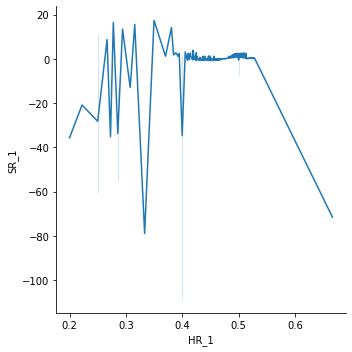

In [192]:
sns.relplot(x="HR_1", y="SR_1", kind="line", data=gg_1)

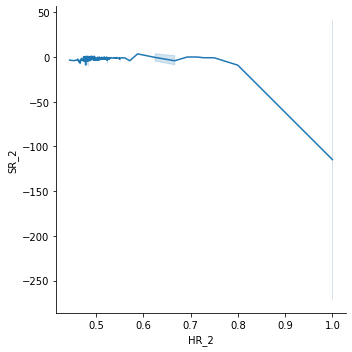

In [193]:
sns.relplot(x="HR_2", y="SR_2", kind="line", data=gg_1)

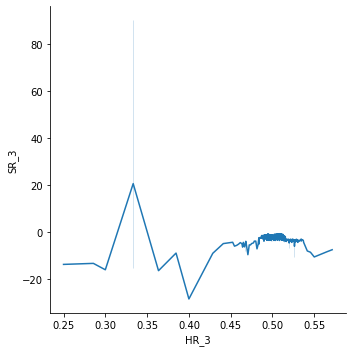

In [194]:
sns.relplot(x="HR_3", y="SR_3", kind="line", data=gg_1)

In [236]:
# Calculating RMSE between f_i and r_i

In [208]:
gg_1['RMSE_1'] = ((gg_1['f_i_1'] - gg_1['returns'])**2).expanding(1).mean() **0.5
gg_1['RMSE_2'] = ((gg_1['f_i_2'] - gg_1['returns'])**2).expanding(1).mean() **0.5
gg_1['RMSE_3'] = ((gg_1['f_i_3'] - gg_1['returns'])**2).expanding(1).mean() **0.5

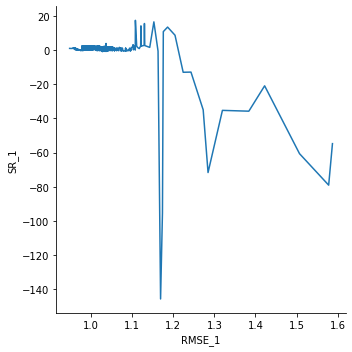

In [210]:
sns.relplot(x="RMSE_1", y="SR_1", kind="line", data=gg_1)